In [62]:
#https://www.ers.usda.gov/data-products/food-environment-atlas/documentation/
#wealth visual https://www.census.gov/library/visualizations/interactive/2014-2018-median-household-income-by-county.html
import pandas as pd
import numpy as np
access_data = pd.read_csv('C:/Users/chris/OneDrive/School/Masters/MIS581/Portfolio Project/2020 Data/ACCESS.csv')
assistance_data = pd.read_csv('C:/Users/chris/OneDrive/School/Masters/MIS581/Portfolio Project/2020 Data/ASSISTANCE.csv')
health_data = pd.read_csv('C:/Users/chris/OneDrive/School/Masters/MIS581/Portfolio Project/2020 Data/HEALTH.csv')
insecurity_data = pd.read_csv('C:/Users/chris/OneDrive/School/Masters/MIS581/Portfolio Project/2020 Data/INSECURITY.csv')
local_data = pd.read_csv('C:/Users/chris/OneDrive/School/Masters/MIS581/Portfolio Project/2020 Data/LOCAL.csv')
restaurants_data = pd.read_csv('C:/Users/chris/OneDrive/School/Masters/MIS581/Portfolio Project/2020 Data/RESTAURANTS.csv')
socioeconomic_data = pd.read_csv('C:/Users/chris/OneDrive/School/Masters/MIS581/Portfolio Project/2020 Data/SOCIOECONOMIC.csv')
stores_data = pd.read_csv('C:/Users/chris/OneDrive/School/Masters/MIS581/Portfolio Project/2020 Data/STORES.csv')
supplemental_data_county_data = pd.read_csv('C:/Users/chris/OneDrive/School/Masters/MIS581/Portfolio Project/2020 Data/supplemental_data_county.csv')
supplemental_data_state_data = pd.read_csv('C:/Users/chris/OneDrive/School/Masters/MIS581/Portfolio Project/2020 Data/supplemental_data_state.csv')
taxes_data = pd.read_csv('C:/Users/chris/OneDrive/School/Masters/MIS581/Portfolio Project/2020 Data/TAXES.csv')

#Creating Primary Key data set that everything will be joined to
P_KEY = access_data[['FIPS','County','State']]
P_KEY = P_KEY.set_index(['FIPS','County','State'])

#Joining Access Data
access_data = access_data.set_index(['FIPS','County','State'])
P_KEY = P_KEY.join(access_data, how = 'left')

#Joining Assistance Data
assistance_data = assistance_data.set_index(['FIPS','County','State'])
P_KEY = P_KEY.join(assistance_data, how = 'left')

#Joining Health Data
health_data = health_data.set_index(['FIPS','County','State'])
P_KEY = P_KEY.join(health_data, how = 'left')

#Joining insecurity Data
insecurity_data = insecurity_data.set_index(['FIPS','County','State'])
P_KEY = P_KEY.join(insecurity_data, how = 'left' , lsuffix = 'P_KEY', rsuffix = 'insecurity')

#Joining local Data
local_data = local_data.set_index(['FIPS','County','State'])
P_KEY = P_KEY.join(local_data, how = 'left', lsuffix = 'P_KEY', rsuffix = 'local')

#Joining restaurant Data
restaurants_data = restaurants_data.set_index(['FIPS','County','State'])
P_KEY = P_KEY.join(restaurants_data, how = 'left', lsuffix = 'P_KEY', rsuffix = 'restaurant')

#Joining socioeconomic Data
socioeconomic_data = socioeconomic_data.set_index(['FIPS','County','State'])
P_KEY = P_KEY.join(socioeconomic_data, how = 'left')

#Joining stores Data
stores_data = stores_data.set_index(['FIPS','County','State'])
P_KEY = P_KEY.join(stores_data, how = 'left', lsuffix = 'P_KEY', rsuffix = 'stores')

#Joining taxes Data
taxes_data = taxes_data.set_index(['FIPS','County','State'])
P_KEY = P_KEY.join(taxes_data, how = 'left', lsuffix = 'P_KEY', rsuffix = 'stores')

#Joining county Data
supplemental_data_county_data['County'] = supplemental_data_county_data['County'].replace('County','',regex=True)

supplemental_data_county_data = supplemental_data_county_data.set_index(['FIPS','County','State'])

P_KEY = P_KEY.join(supplemental_data_county_data, how = 'left')

In [63]:
P_KEY_Trends = P_KEY.reset_index()
trend_data = P_KEY_Trends[['FIPS','County','State',
'PCH_LACCESS_POP_10_15',
'PCH_LACCESS_LOWI_10_15',
'PCH_LACCESS_HHNV_10_15',
'LACCESS_CHILD_10_15',
'PCH_LACCESS_SENIORS_10_15',
'PCH_GROC_11_16',
'PCH_GROCPTH_11_16',
'PCH_SUPERC_11_16',
'PCH_SUPERCPTH_11_16',
'PCH_CONVS_11_16',
'PCH_CONVSPTH_11_16',
'PCH_SPECS_11_16',
'PCH_SPECSPTH_11_16',
'PCH_SNAPS_12_17',
'PCH_SNAPSPTH_12_17',
'PCH_WICS_11_16',
'PCH_WICSPTH_11_16',
'PCH_FFR_11_16',
'PCH_FFRPTH_11_16',
'PCH_FSR_11_16',
'PCH_FSRPTH_11_16',
'PCH_REDEMP_SNAPS_12_17',
'PCH_PC_SNAPBEN_12_17',
'PCH_PC_WIC_REDEMP_11_16',
'PCH_REDEMP_WICS_11_16',
'PCH_DIRSALES_FARMS_07_12',
'PCH_DIRSALES_07_12',
'PCH_PC_DIRSALES_07_12',
'PCH_FMRKT_13_18',
'PCH_FMRKTPTH_13_18',
'PCH_VEG_FARMS_07_12',
'PCH_VEG_ACRES_07_12',
'PCH_VEG_ACRESPTH_07_12',
'PCH_FRESHVEG_FARMS_07_12',
'PCH_FRESHVEG_ACRES_07_12',
'PCH_FRESHVEG_ACRESPTH_07_12',
'PCH_ORCHARD_FARMS_07_12',
'PCH_ORCHARD_ACRES_07_12',
'PCH_ORCHARD_ACRESPTH_07_12',
'PCH_BERRY_FARMS_07_12',
'PCH_BERRY_ACRES_07_12',
'PCH_BERRY_ACRESPTH_07_12',
'PCH_SLHOUSE_07_12',
'PCH_GHVEG_FARMS_07_12',
'PCH_GHVEG_SQFT_07_12',
'PCH_GHVEG_SQFTPTH_07_12',
'PCH_CSA_07_12',
'PCH_AGRITRSM_OPS_07_12',
'PCH_AGRITRSM_RCT_07_12',
'PCH_RECFAC_11_16',
'PCH_RECFACPTH_11_16'
]]


In [64]:
P_KEY_data = P_KEY.reset_index()
corr_data = P_KEY_data[['FIPS','County','State',
'LACCESS_POP10',
'LACCESS_POP15',
'PCT_LACCESS_POP10',
'PCT_LACCESS_POP15',
'LACCESS_LOWI10',
'LACCESS_LOWI15',
'PCT_LACCESS_LOWI10',
'PCT_LACCESS_LOWI15',
'LACCESS_HHNV10',
'LACCESS_HHNV15',
'PCT_LACCESS_HHNV10',
'PCT_LACCESS_HHNV15',
'LACCESS_SNAP15',
'PCT_LACCESS_SNAP15',
'LACCESS_CHILD10',
'LACCESS_CHILD15',
'PCT_LACCESS_CHILD10',
'PCT_LACCESS_CHILD15',
'LACCESS_SENIORS10',
'LACCESS_SENIORS15',
'PCT_LACCESS_SENIORS10',
'PCT_LACCESS_SENIORS15',
'LACCESS_WHITE15',
'PCT_LACCESS_WHITE15',
'LACCESS_BLACK15',
'PCT_LACCESS_BLACK15',
'LACCESS_HISP15',
'PCT_LACCESS_HISP15',
'LACCESS_NHASIAN15',
'PCT_LACCESS_NHASIAN15',
'LACCESS_NHNA15',
'PCT_LACCESS_NHNA15',
'LACCESS_NHPI15',
'PCT_LACCESS_NHPI15',
'LACCESS_MULTIR15',
'PCT_LACCESS_MULTIR15',
'GROC11',
'GROC16',
'GROCPTH11',
'GROCPTH16',
'SUPERC11',
'SUPERC16',
'SUPERCPTH11',
'SUPERCPTH16',
'CONVS11',
'CONVS16',
'CONVSPTH11',
'CONVSPTH16',
'SPECS11',
'SPECS16',
'SPECSPTH11',
'SPECSPTH16',
'SNAPS12',
'SNAPS17',
'SNAPSPTH12',
'SNAPSPTH17',
'WICS11',
'WICS16',
'WICSPTH11',
'WICSPTH16',
'FFR11',
'FFR16',
'FFRPTH11',
'FFRPTH16',
'FSR11',
'FSR16',
'FSRPTH11',
'FSRPTH16',
'PC_FFRSALES07',
'PC_FFRSALES12',
'PC_FSRSALES07',
'PC_FSRSALES12',
'REDEMP_SNAPS12',
'REDEMP_SNAPS17',
'PCT_SNAP12',
'PCT_SNAP17',
'PCH_SNAP_12_17',
'PC_SNAPBEN12',
'PC_SNAPBEN17',
'SNAP_PART_RATE11',
'SNAP_PART_RATE16',
'SNAP_OAPP09',
'SNAP_OAPP16',
'SNAP_CAP09',
'SNAP_CAP16',
'SNAP_BBCE09',
'SNAP_BBCE16',
'SNAP_REPORTSIMPLE09',
'SNAP_REPORTSIMPLE16',
'PCT_NSLP12',
'PCT_NSLP17',
'PCH_NSLP_12_17',
'PCT_FREE_LUNCH10',
'PCT_FREE_LUNCH15',
'PCT_REDUCED_LUNCH10',
'PCT_REDUCED_LUNCH15',
'PCT_SBP12',
'PCT_SBP17',
'PCH_SBP_12_17',
'PCT_SFSP12',
'PCT_SFSP17',
'PCH_SFSP_12_17',
'PC_WIC_REDEMP11',
'PC_WIC_REDEMP16',
'REDEMP_WICS11',
'REDEMP_WICS16',
'PCT_WIC12',
'PCT_WIC17',
'PCH_WIC_12_17',
'PCT_WICINFANTCHILD14',
'PCT_WICINFANTCHILD16',
'PCH_WICINFANTCHILD_14_16',
'PCT_WICWOMEN14',
'PCT_WICWOMEN16',
'PCH_WICWOMEN_14_16',
'PCT_CACFP12',
'PCT_CACFP17',
'PCH_CACFP_12_17',
'FDPIR12',
'FDPIR15',
'PCH_FDPIR_12_15',
'FOOD_BANKS18',
'FOODINSEC_12_14',
'FOODINSEC_15_17',
'CH_FOODINSEC_14_17',
'VLFOODSEC_12_14',
'VLFOODSEC_15_17',
'CH_VLFOODSEC_14_17',
'SODATAX_STORES14',
'SODATAX_VENDM14',
'CHIPSTAX_STORES14',
'CHIPSTAX_VENDM14',
'FOOD_TAX14',
'DIRSALES_FARMS07',
'DIRSALES_FARMS12',
'PCT_LOCLFARM07',
'PCT_LOCLFARM12',
'PCT_LOCLSALE07',
'PCT_LOCLSALE12',
'DIRSALES07',
'DIRSALES12',
'PC_DIRSALES07',
'PC_DIRSALES12',
'FMRKT13',
'FMRKT18',
'FMRKTPTH13',
'FMRKTPTH18',
'FMRKT_SNAP18',
'PCT_FMRKT_SNAP18',
'FMRKT_WIC18',
'PCT_FMRKT_WIC18',
'FMRKT_WICCASH18',
'PCT_FMRKT_WICCASH18',
'FMRKT_SFMNP18',
'PCT_FMRKT_SFMNP18',
'FMRKT_CREDIT18',
'PCT_FMRKT_CREDIT18',
'FMRKT_FRVEG18',
'PCT_FMRKT_FRVEG18',
'FMRKT_ANMLPROD18',
'PCT_FMRKT_ANMLPROD18',
'FMRKT_BAKED18',
'PCT_FMRKT_BAKED18',
'FMRKT_OTHERFOOD18',
'PCT_FMRKT_OTHERFOOD18',
'VEG_FARMS07',
'VEG_FARMS12',
'VEG_ACRES07',
'VEG_ACRES12',
'VEG_ACRESPTH07',
'VEG_ACRESPTH12',
'FRESHVEG_FARMS07',
'FRESHVEG_FARMS12',
'FRESHVEG_ACRES07',
'FRESHVEG_ACRES12',
'FRESHVEG_ACRESPTH07',
'FRESHVEG_ACRESPTH12',
'ORCHARD_FARMS07',
'ORCHARD_FARMS12',
'ORCHARD_ACRES07',
'ORCHARD_ACRES12',
'ORCHARD_ACRESPTH07',
'ORCHARD_ACRESPTH12',
'BERRY_FARMS07',
'BERRY_FARMS12',
'BERRY_ACRES07',
'BERRY_ACRES12',
'BERRY_ACRESPTH07',
'BERRY_ACRESPTH12',
'SLHOUSE07',
'SLHOUSE12',
'GHVEG_FARMS07',
'GHVEG_FARMS12',
'GHVEG_SQFT07',
'GHVEG_SQFT12',
'GHVEG_SQFTPTH07',
'GHVEG_SQFTPTH12',
'FOODHUB18',
'CSA07',
'CSA12',
'AGRITRSM_OPS07',
'AGRITRSM_OPS12',
'AGRITRSM_RCT07',
'AGRITRSM_RCT12',
'FARM_TO_SCHOOL13',
'FARM_TO_SCHOOL15',
'PCT_DIABETES_ADULTS08',
'PCT_DIABETES_ADULTS13',
'PCT_OBESE_ADULTS12',
'PCT_OBESE_ADULTS17',
'PCT_HSPA17',
'RECFAC11',
'RECFAC16',
'RECFACPTH11',
'RECFACPTH16',
'PCT_NHWHITE10',
'PCT_NHBLACK10',
'PCT_HISP10',
'PCT_NHASIAN10',
'PCT_NHNA10',
'PCT_NHPI10',
'PCT_65OLDER10',
'PCT_18YOUNGER10',
'MEDHHINC15',
'POVRATE15',
'PERPOV10',
'CHILDPOVRATE15',
'PERCHLDPOV10',
'METRO13',
'POPLOSS10'
]]


<AxesSubplot:title={'center':'Top 20 Variable Correlation with Direct Farm Sales in 2012'}>

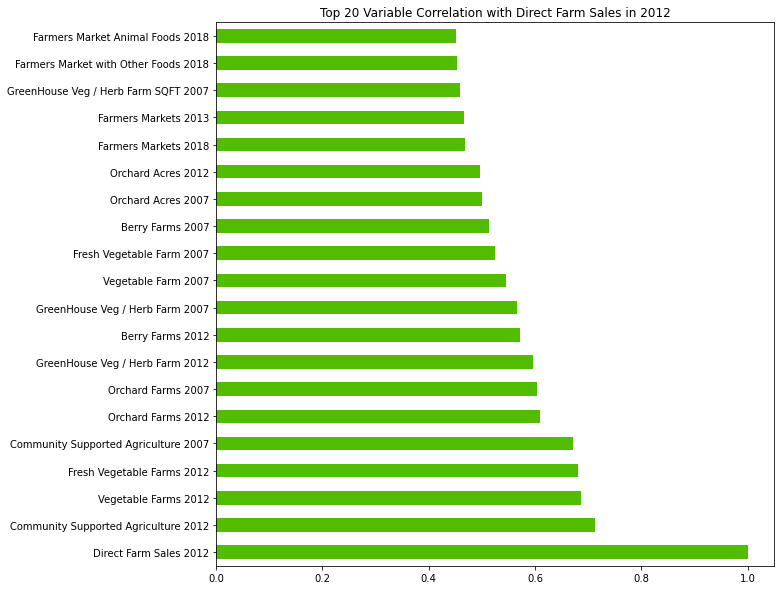

In [65]:
pd.set_option('display.max_rows',1000)

corr_data = corr_data.drop(columns={'FIPS','PC_DIRSALES12','PCT_LOCLSALE12','PCT_LOCLFARM12','DIRSALES_FARMS12','DIRSALES07','DIRSALES_FARMS12','DIRSALES_FARMS07'})

corr_data = corr_data.rename(columns={
'DIRSALES12' : 'Direct Farm Sales 2012',
'CSA12' : 'Community Supported Agriculture 2012',
'VEG_FARMS12' : 'Vegetable Farms 2012',
'FRESHVEG_FARMS12' : 'Fresh Vegetable Farms 2012',
'CSA07' : 'Community Supported Agriculture 2007',
'ORCHARD_FARMS12' : 'Orchard Farms 2012',
'ORCHARD_FARMS07' : 'Orchard Farms 2007',
'GHVEG_FARMS12' : 'GreenHouse Veg / Herb Farm 2012',
'VEG_FARMS07' : 'Vegetable Farm 2007',
'FRESHVEG_FARMS07' : 'Fresh Vegetable Farm 2007',
'BERRY_FARMS12' : 'Berry Farms 2012',
'ORCHARD_ACRES07' : 'Orchard Acres 2007',
'ORCHARD_ACRES07' : 'Orchard Acres 2007',
'ORCHARD_ACRES12' : 'Orchard Acres 2012',
'FMRKT13' : 'Farmers Markets 2013',
'FMRKT18' : 'Farmers Markets 2018',
'GHVEG_SQFT07' : 'GreenHouse Veg / Herb Farm SQFT 2007',
'FMRKT_OTHERFOOD18' : 'Farmers Market with Other Foods 2018',
'FMRKT_ANMLPROD18' : 'Farmers Market Animal Foods 2018',
'FMRKT_ANMLPROD18' : 'Farmers Market Animal Foods 2018',
'FMRKT_BAKED18' : 'Farmers Market Baked Goods 2018',
'FMRKT_FRVEG18' : 'Farmers Market Fresh Vegetables 2018',
'GHVEG_FARMS07' : 'GreenHouse Veg / Herb Farm 2007',
'BERRY_FARMS07' : 'Berry Farms 2007',
})


corr_data_analysis = abs(corr_data.corr())





corr_data_analysis['Direct Farm Sales 2012'].sort_values(ascending = False).head(20).plot(kind='barh',figsize=[10,10],title='Top 20 Variable Correlation with Direct Farm Sales in 2012',color = '#52bd00' )

In [66]:
#Pearson's Correlation test - Diabeties Health
from scipy.stats import pearsonr
model_data = P_KEY.reset_index().fillna(0)
stat, p = pearsonr(model_data.PCT_DIABETES_ADULTS13, model_data.DIRSALES12)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=-0.211, p=0.000
Probably dependent


In [67]:
#Pearson's Correlation test - GROCPTH16
from scipy.stats import pearsonr
model_data = P_KEY.reset_index().fillna(0)
stat, p = pearsonr(model_data.FFR16, model_data.DIRSALES12)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.276, p=0.000
Probably dependent


In [68]:
#Pearson's Correlation test
from scipy.stats import pearsonr
model_data = P_KEY.reset_index().fillna(0)
stat, p = pearsonr(model_data.FSR16, model_data.DIRSALES12)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.284, p=0.000
Probably dependent


In [69]:
#Pearson's Correlation test
from scipy.stats import pearsonr
model_data = P_KEY.reset_index().fillna(0)
stat, p = pearsonr(model_data.GROC16, model_data.DIRSALES12)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.220, p=0.000
Probably dependent


In [70]:

#Pearson's Correlation test
from scipy.stats import pearsonr
model_data = P_KEY.reset_index().fillna(0)
stat, p = pearsonr(model_data.CSA12, model_data.DIRSALES12)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.716, p=0.000
Probably dependent


In [71]:
#Pearson's Correlation test
from scipy.stats import pearsonr
model_data = P_KEY.reset_index().fillna(0)
stat, p = pearsonr(model_data.FRESHVEG_FARMS12, model_data.DIRSALES12)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.685, p=0.000
Probably dependent


In [72]:
#Pearson's Correlation test
from scipy.stats import pearsonr
model_data = P_KEY.reset_index().fillna(0)
stat, p = pearsonr(model_data.VEG_FARMS12, model_data.DIRSALES12)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.691, p=0.000
Probably dependent


In [73]:
#Splitting the data
model_data = P_KEY.reset_index().fillna(0)
X = model_data.drop(columns ={'FIPS','County','State','DIRSALES12','PCH_DIRSALES_07_12','PC_DIRSALES12','PCH_PC_DIRSALES_07_12','PCT_LOCLSALE12','PCT_LOCLFARM12','DIRSALES_FARMS12'})
y = model_data['DIRSALES12']


#Splitting the data between training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)


In [74]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators = 100, max_depth = 15, min_samples_leaf = 1, max_features = 50 , max_leaf_nodes = 100)

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

y_true = y_test
r2 = r2_score(y_true,y_pred)
print('R-squared: ',    r2)



R-squared:  0.8239025301143028


In [75]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

gbrt = GradientBoostingRegressor(max_depth= 4, n_estimators=300, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=4, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)
y_pred = gbrt_best.predict(X_test)
y_true = y_test
print('R-squared: ',  r2_score(y_true,y_pred))



R-squared:  0.8255012849245115


In [76]:
cook_data = model_data[model_data.FIPS == 17031]
cook_data = cook_data.drop(columns ={'FIPS','County','State','DIRSALES12','PCH_DIRSALES_07_12','PC_DIRSALES12','PCH_PC_DIRSALES_07_12','PCT_LOCLSALE12','PCT_LOCLFARM12','DIRSALES_FARMS12'})

will_data = model_data[model_data.FIPS == 17197]
will_data_actual = pd.DataFrame(model_data['DIRSALES12'][model_data.FIPS == 17197])
will_data = will_data.drop(columns ={'FIPS','County','State','DIRSALES12','PCH_DIRSALES_07_12','PC_DIRSALES12','PCH_PC_DIRSALES_07_12','PCT_LOCLSALE12','PCT_LOCLFARM12','DIRSALES_FARMS12'})

dupage_county = model_data[model_data.FIPS == 17043]
dupage_county = dupage_county.drop(columns ={'FIPS','County','State','DIRSALES12','PCH_DIRSALES_07_12','PC_DIRSALES12','PCH_PC_DIRSALES_07_12','PCT_LOCLSALE12','PCT_LOCLFARM12','DIRSALES_FARMS12'})

lake_county = model_data[model_data.FIPS == 17097]
lake_county = lake_county.drop(columns ={'FIPS','County','State','DIRSALES12','PCH_DIRSALES_07_12','PC_DIRSALES12','PCH_PC_DIRSALES_07_12','PCT_LOCLSALE12','PCT_LOCLFARM12','DIRSALES_FARMS12'})

mchenry_county = model_data[model_data.FIPS == 17111]
mchenry_county = mchenry_county.drop(columns ={'FIPS','County','State','DIRSALES12','PCH_DIRSALES_07_12','PC_DIRSALES12','PCH_PC_DIRSALES_07_12','PCT_LOCLSALE12','PCT_LOCLFARM12','DIRSALES_FARMS12'})

kankakee_county = model_data[model_data.FIPS == 17091]
kankakee_county = kankakee_county.drop(columns ={'FIPS','County','State','DIRSALES12','PCH_DIRSALES_07_12','PC_DIRSALES12','PCH_PC_DIRSALES_07_12','PCT_LOCLSALE12','PCT_LOCLFARM12','DIRSALES_FARMS12'})

kendall_county = model_data[model_data.FIPS == 17093]
kendall_county = kendall_county.drop(columns ={'FIPS','County','State','DIRSALES12','PCH_DIRSALES_07_12','PC_DIRSALES12','PCH_PC_DIRSALES_07_12','PCT_LOCLSALE12','PCT_LOCLFARM12','DIRSALES_FARMS12'})

print('Cook County Direct Sales Prediction:',rf.predict(cook_data))
print('Will County Direct Sales Prediction:',rf.predict(will_data))
print('DuPage County Direct Sales Prediction:',rf.predict(dupage_county))
print('Lake County County Direct Sales Prediction:',rf.predict(lake_county))
print('McHenry County County Direct Sales Prediction:',rf.predict(mchenry_county))
print('Kankakee County County Direct Sales Prediction:',rf.predict(kankakee_county))
print('Kendall County County Direct Sales Prediction:',rf.predict(kendall_county))

Cook County Direct Sales Prediction: [726.27865204]
Will County Direct Sales Prediction: [1865.41680534]
DuPage County Direct Sales Prediction: [120.72011997]
Lake County County Direct Sales Prediction: [1274.39520728]
McHenry County County Direct Sales Prediction: [3118.79593684]
Kankakee County County Direct Sales Prediction: [446.71119881]
Kendall County County Direct Sales Prediction: [824.26613491]


<AxesSubplot:title={'center':'Specialized food stores/1,000 pop, 2016'}, xlabel='County'>

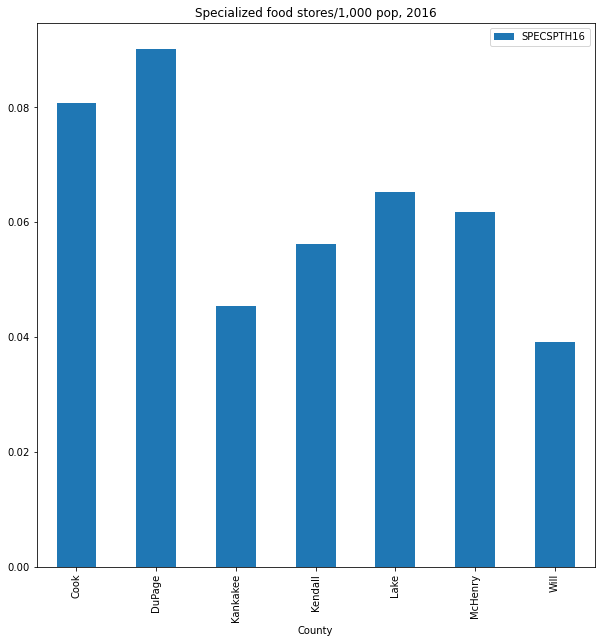

In [77]:
model_data[['County','SPECSPTH16']][model_data.FIPS.isin([17031,17197,17043,17097,17111,17091,17093])].plot(x = 'County',y = 'SPECSPTH16',kind = 'bar',figsize = [10,10],title = 'Specialized food stores/1,000 pop, 2016')

<AxesSubplot:title={'center':'Grocery stores/1,000 pop, 2016'}, xlabel='County'>

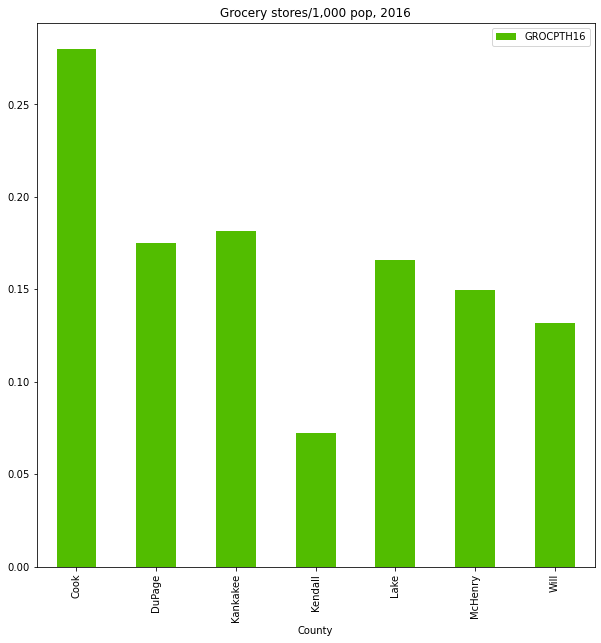

In [78]:
model_data[['County','GROCPTH16']][model_data.FIPS.isin([17031,17197,17043,17097,17111,17091,17093])].plot(x = 'County',y = 'GROCPTH16',kind = 'bar',figsize = [10,10],title = 'Grocery stores/1,000 pop, 2016',color = '#52bd00')

<AxesSubplot:title={'center':'Grocery Store 5 Year Percent Change'}, xlabel='County'>

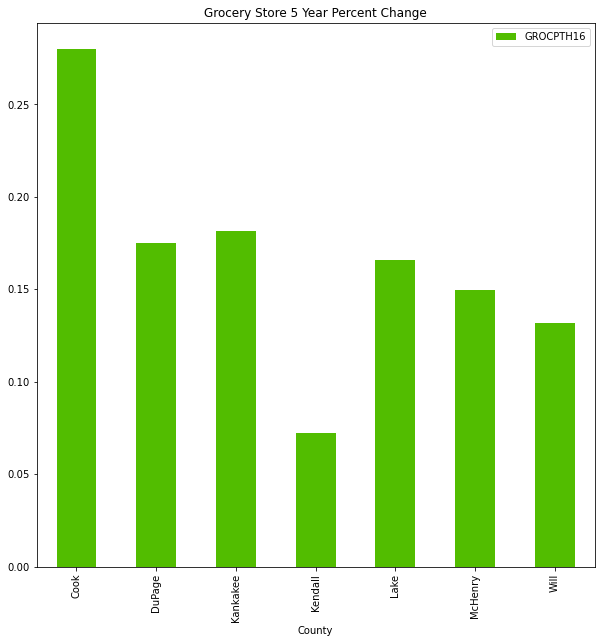

In [79]:
model_data[['County','GROCPTH16']][model_data.FIPS.isin([17031,17197,17043,17097,17111,17091,17093])].plot(x = 'County',y = 'GROCPTH16',kind = 'bar',figsize = [10,10],title = 'Grocery Store 5 Year Percent Change',color = '#52bd00')

<AxesSubplot:title={'center':'Fast-food restaurants/1,000 pop, 2016'}, xlabel='County'>

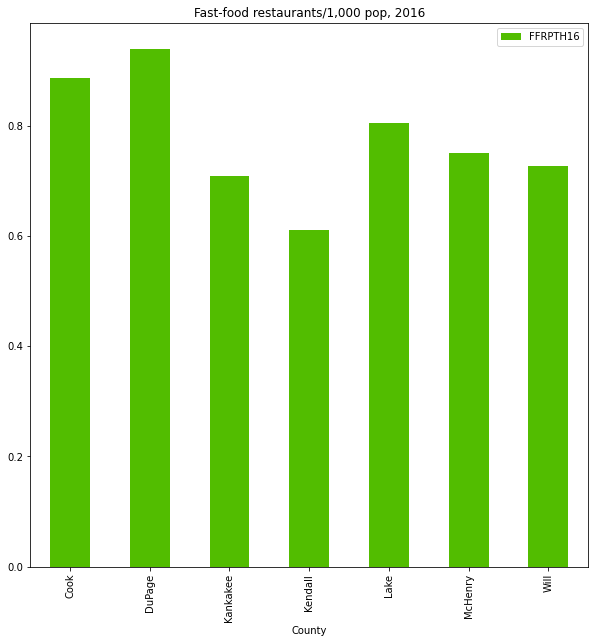

In [80]:
model_data[['County','FFRPTH16']][model_data.FIPS.isin([17031,17197,17043,17097,17111,17091,17093])].plot(x = 'County',y = 'FFRPTH16',kind = 'bar',figsize = [10,10],title = 'Fast-food restaurants/1,000 pop, 2016',color = '#52bd00')

<AxesSubplot:title={'center':'Full-service restaurants/1,000 pop, 2016'}, xlabel='County'>

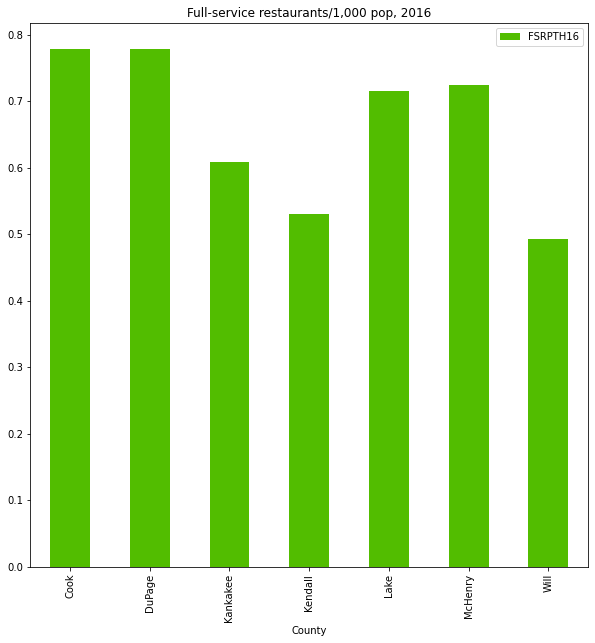

In [81]:
model_data[['County','FSRPTH16']][model_data.FIPS.isin([17031,17197,17043,17097,17111,17091,17093])].plot(x = 'County',y = 'FSRPTH16',kind = 'bar',figsize = [10,10],title = 'Full-service restaurants/1,000 pop, 2016',color = '#52bd00')

<AxesSubplot:title={'center':'2013 Diabeties Percentage'}, xlabel='County'>

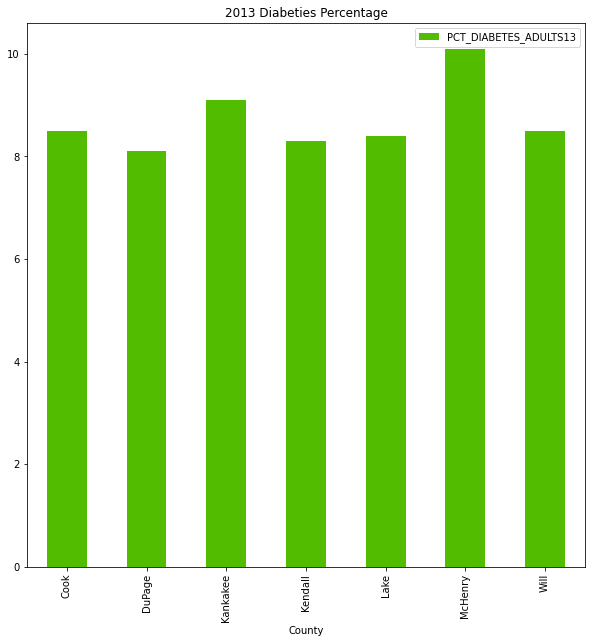

In [82]:
model_data[['County','PCT_DIABETES_ADULTS13']][model_data.FIPS.isin([17031,17197,17043,17097,17111,17091,17093])].plot(x = 'County',y = 'PCT_DIABETES_ADULTS13',kind = 'bar',figsize = [10,10],title = '2013 Diabeties Percentage',color = '#52bd00')

<AxesSubplot:title={'center':'Recreation & fitness facilities/1,000 pop, 2016'}, xlabel='County'>

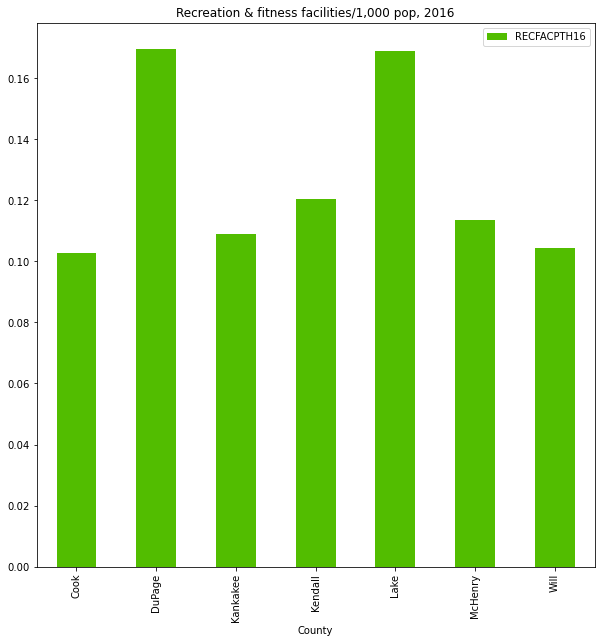

In [83]:
model_data[['County','RECFACPTH16']][model_data.FIPS.isin([17031,17197,17043,17097,17111,17091,17093])].plot(x = 'County',y = 'RECFACPTH16',kind = 'bar',figsize = [10,10],title = 'Recreation & fitness facilities/1,000 pop, 2016',color = '#52bd00')

<AxesSubplot:title={'center':'Recreation & fitness facilities/1,000 pop, 2016'}, xlabel='County'>

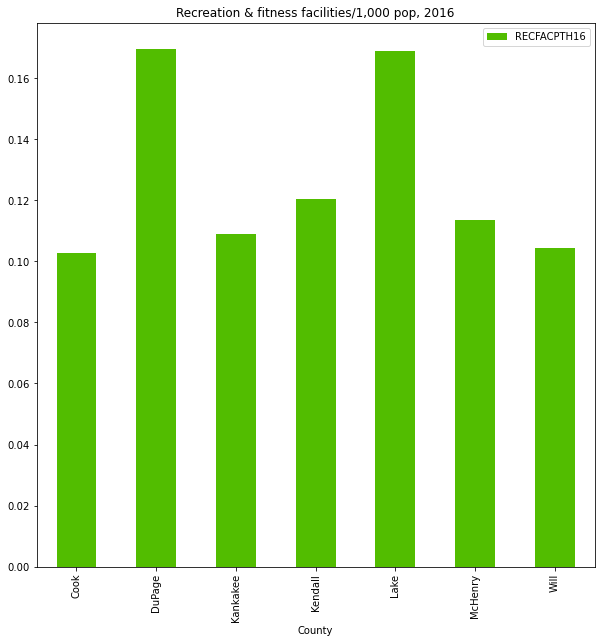

In [84]:
model_data[['County','RECFACPTH16']][model_data.FIPS.isin([17031,17197,17043,17097,17111,17091,17093])].plot(x = 'County',y = 'RECFACPTH16',kind = 'bar',figsize = [10,10],title = 'Recreation & fitness facilities/1,000 pop, 2016',color = '#52bd00')


<AxesSubplot:title={'center':'Adult diabetes rate, 2013'}, xlabel='County'>

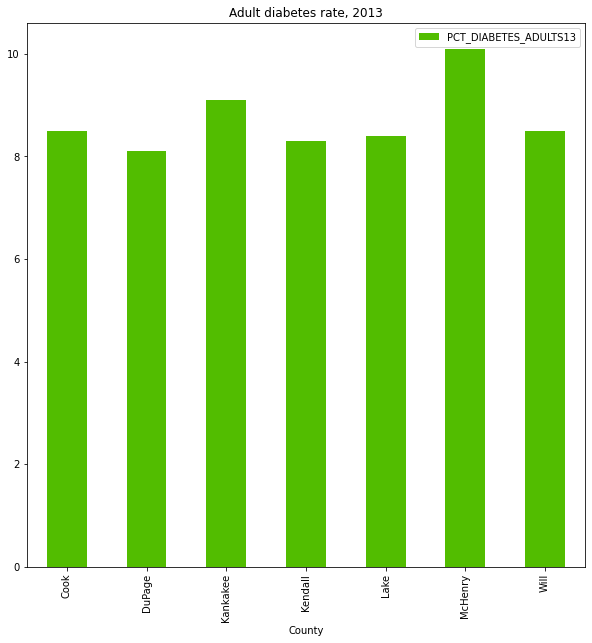

In [85]:
model_data[['County','PCT_DIABETES_ADULTS13']][model_data.FIPS.isin([17031,17197,17043,17097,17111,17091,17093])].plot(x = 'County',y = 'PCT_DIABETES_ADULTS13',kind = 'bar',figsize = [10,10],title = 'Adult diabetes rate, 2013',color = '#52bd00')


<AxesSubplot:title={'center':'Farmers markets, 2018'}, xlabel='County'>

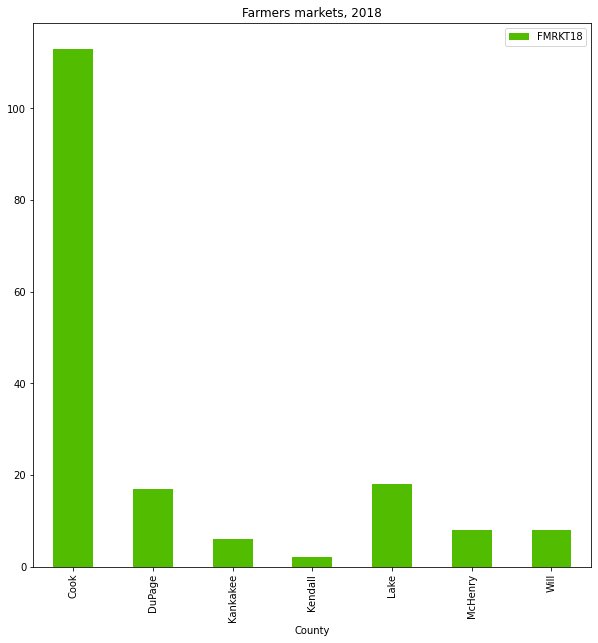

In [86]:
model_data[['County','FMRKT18']][model_data.FIPS.isin([17031,17197,17043,17097,17111,17091,17093])].plot(x = 'County',y = 'FMRKT18',kind = 'bar',figsize = [10,10],title = 'Farmers markets, 2018',color = '#52bd00')


<AxesSubplot:title={'center':'Grocery, Restaurant, and Recreational Center Populations 2016'}, xlabel='County'>

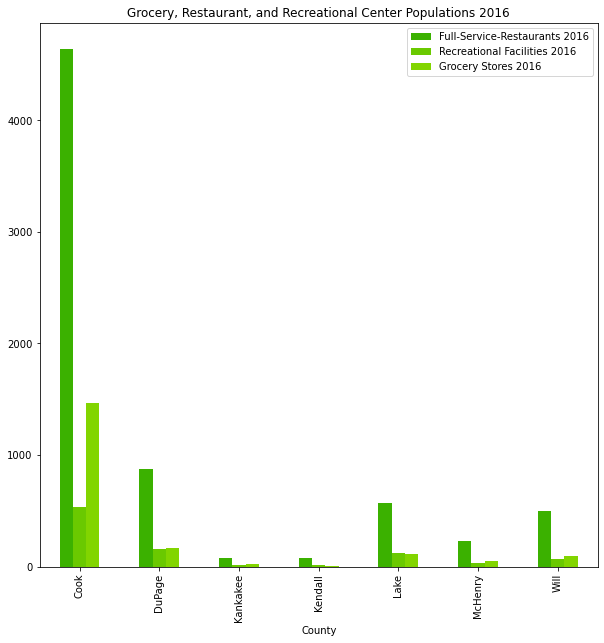

In [99]:
literature_variables = model_data[['County','FFR16','RECFAC16','GROC16']]
literature_variables = literature_variables.rename(columns={'FFR16' : 'Full-Service-Restaurants 2016','RECFAC16' : 'Recreational Facilities 2016','GROC16' : 'Grocery Stores 2016'})

literature_variables[['County','Full-Service-Restaurants 2016','Recreational Facilities 2016','Grocery Stores 2016']][model_data.FIPS.isin([17031,17197,17043,17097,17111,17091,17093])].plot(x = 'County',y = ['Full-Service-Restaurants 2016','Recreational Facilities 2016','Grocery Stores 2016'],kind = 'bar',figsize = [10,10],title = 'Grocery, Restaurant, and Recreational Center Populations 2016',color = ['#3bb100','#6ac900','#82d500'])


<AxesSubplot:title={'center':'Farmers markets (% change), 2013-18'}, xlabel='County', ylabel='Percent Change'>

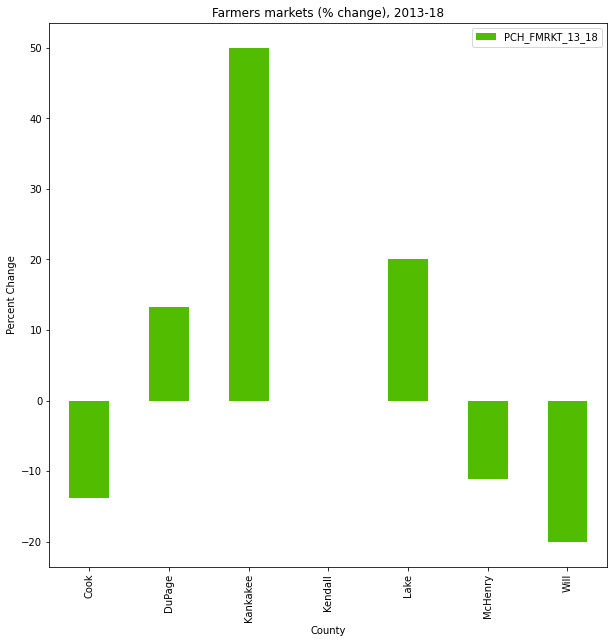

In [87]:
model_data[['County','PCH_FMRKT_13_18']][model_data.FIPS.isin([17031,17197,17043,17097,17111,17091,17093])].plot(x = 'County',y = 'PCH_FMRKT_13_18',kind = 'bar',figsize = [10,10],title = 'Farmers markets (% change), 2013-18', ylabel = 'Percent Change',color = '#52bd00')


<AxesSubplot:title={'center':'Vegetable farms, 2012'}, xlabel='County'>

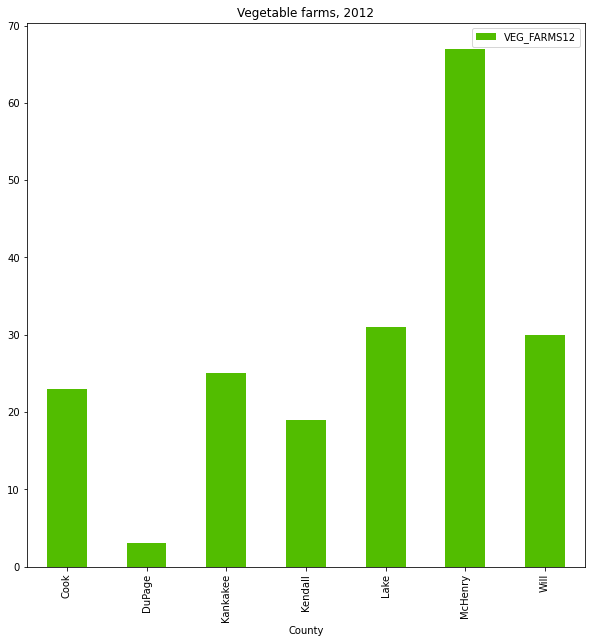

In [88]:
model_data[['County','VEG_FARMS12']][model_data.FIPS.isin([17031,17197,17043,17097,17111,17091,17093])].plot(x = 'County',y = 'VEG_FARMS12',kind = 'bar',figsize = [10,10],title = 'Vegetable farms, 2012',color = '#52bd00')


<AxesSubplot:title={'center':'Orchard farms, 2012'}, xlabel='County'>

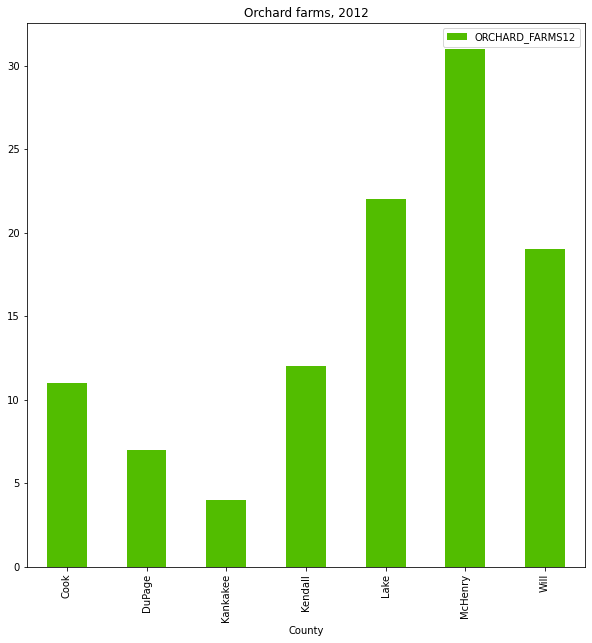

In [89]:
model_data[['County','ORCHARD_FARMS12']][model_data.FIPS.isin([17031,17197,17043,17097,17111,17091,17093])].plot(x = 'County',y = 'ORCHARD_FARMS12',kind = 'bar',figsize = [10,10],title = 'Orchard farms, 2012',color = '#52bd00')


<AxesSubplot:title={'center':'Community Supported Agriculture 2012'}, xlabel='County'>

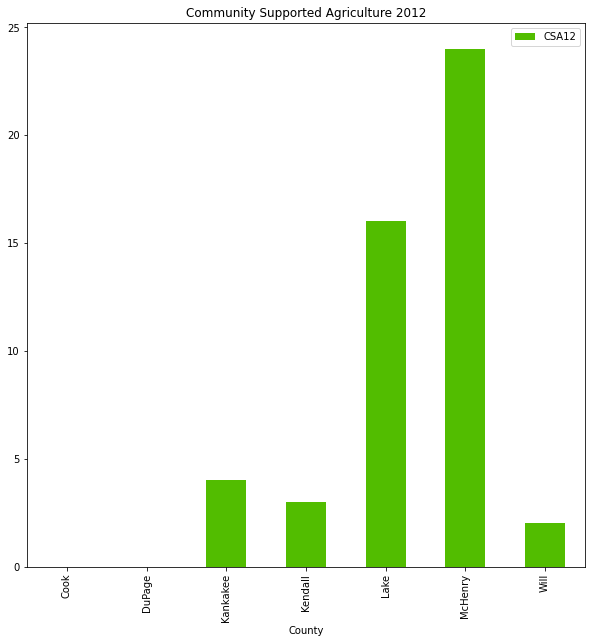

In [90]:
model_data[['County','CSA12']][model_data.FIPS.isin([17031,17197,17043,17097,17111,17091,17093])].plot(x = 'County',y = 'CSA12',kind = 'bar',figsize = [10,10],title = 'Community Supported Agriculture 2012',color = '#52bd00')


<AxesSubplot:title={'center':'Fresh Vegetable Farms 2012'}, xlabel='County'>

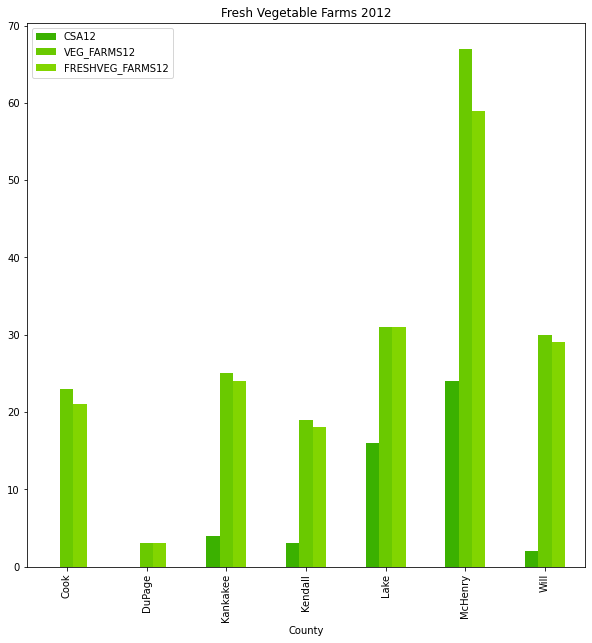

In [93]:
model_data[['County','CSA12','FRESHVEG_FARMS12','VEG_FARMS12']][model_data.FIPS.isin([17031,17197,17043,17097,17111,17091,17093])].plot(x = 'County',y = ['CSA12','VEG_FARMS12','FRESHVEG_FARMS12'],kind = 'bar',figsize = [10,10],title = 'Fresh Vegetable Farms 2012',color = ['#3bb100','#6ac900','#82d500'])


<AxesSubplot:title={'center':'Berry acres, 2012'}, xlabel='County'>

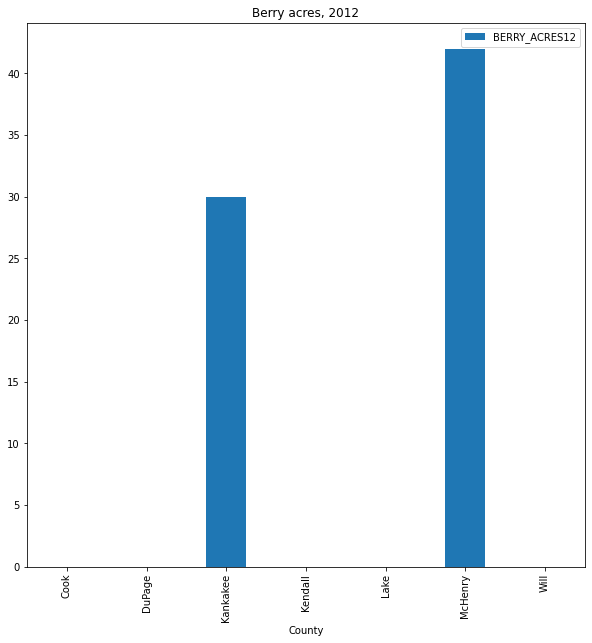

In [24]:
model_data[['County','BERRY_ACRES12']][model_data.FIPS.isin([17031,17197,17043,17097,17111,17091,17093])].plot(x = 'County',y = 'BERRY_ACRES12',kind = 'bar',figsize = [10,10],title = 'Berry acres, 2012')


<AxesSubplot:title={'center':'CSA farms, 2012'}, xlabel='County'>

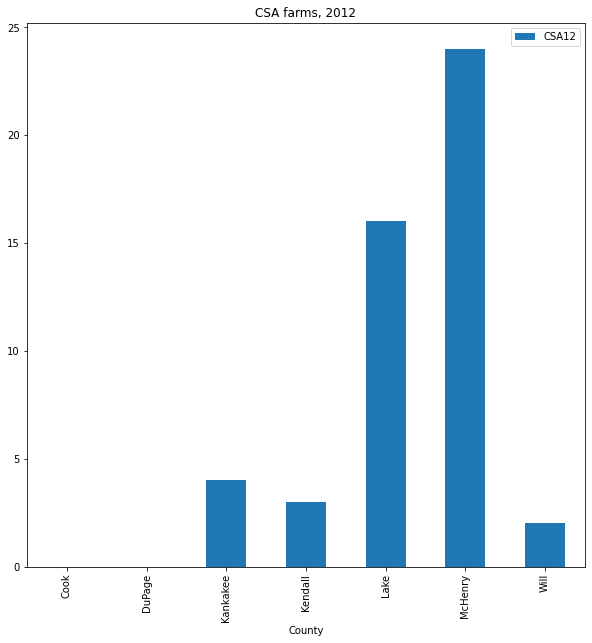

In [25]:
model_data[['County','CSA12']][model_data.FIPS.isin([17031,17197,17043,17097,17111,17091,17093])].plot(x = 'County',y = 'CSA12',kind = 'bar',figsize = [10,10],title = 'CSA farms, 2012')


<AxesSubplot:title={'center':'Direct farm sales, 2012'}, xlabel='County', ylabel='Thousand Dollars of Sales'>

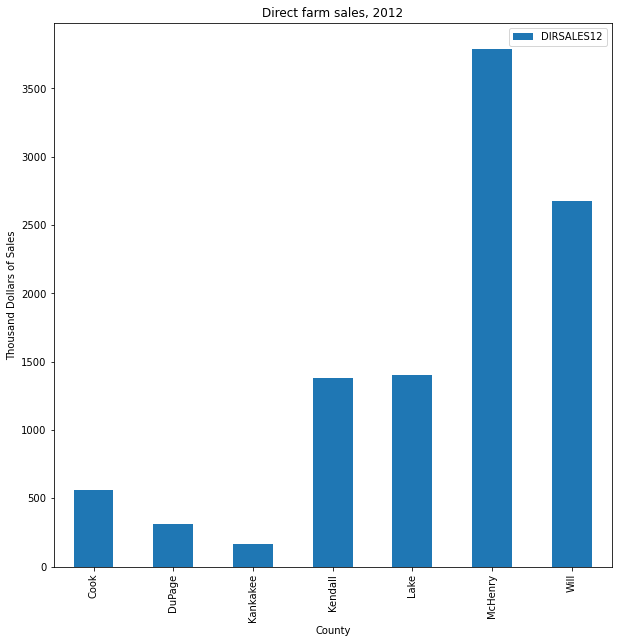

In [26]:
model_data[['County','DIRSALES12']][model_data.FIPS.isin([17031,17197,17043,17097,17111,17091,17093])].plot(x = 'County',y = 'DIRSALES12',kind = 'bar',figsize = [10,10],title = 'Direct farm sales, 2012', ylabel = 'Thousand Dollars of Sales')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

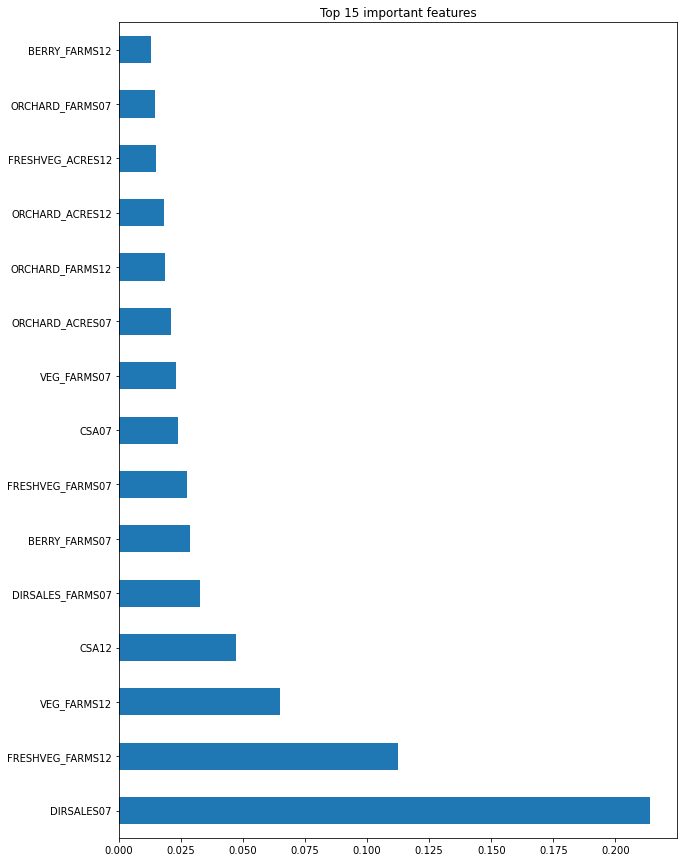

In [114]:
important_features = pd.Series(data=rf.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
#important_features

important_features = important_features.rename
important_features.nlargest(15).plot(kind='barh',figsize = [10,15])
plt.title("Random Forest ")
plt.show()

<AxesSubplot:title={'center':'Correlation Relationship with Direct Farmer Sales in 2012'}, ylabel='Variables'>

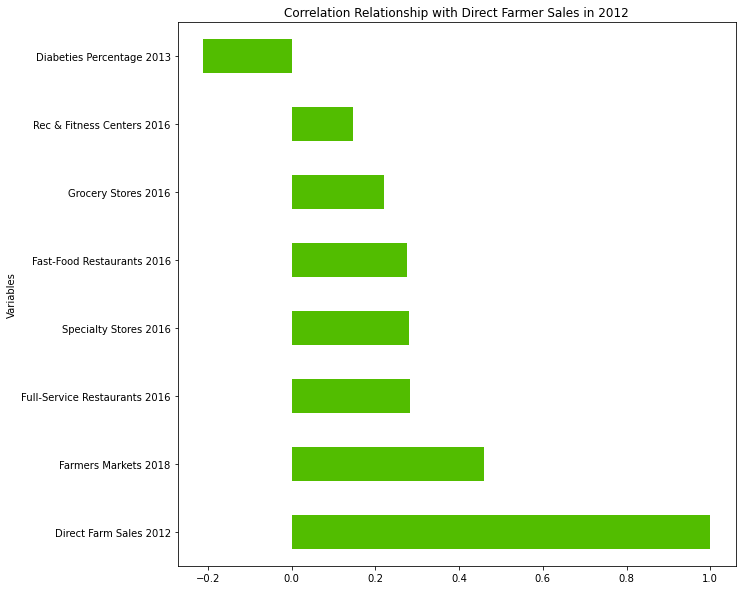

In [102]:
corr_data_analysis = model_data[['DIRSALES12','SPECS16','GROC16','FFR16','FSR16','PCT_DIABETES_ADULTS13','RECFACPTH16','FMRKT18']]
corr_data_analysis = corr_data_analysis.rename(columns={'DIRSALES12' : 'Direct Farm Sales 2012','SPECS16' : 'Specialty Stores 2016',
'GROC16' : 'Grocery Stores 2016','FFR16' : 'Fast-Food Restaurants 2016','FSR16' : 'Full-Service Restaurants 2016','PCT_DIABETES_ADULTS13' : 'Diabeties Percentage 2013','RECFACPTH16' : 'Rec & Fitness Centers 2016','FMRKT18' : 'Farmers Markets 2018'})
corr_data_analysis = corr_data_analysis.corr()

corr_data_analysis['Direct Farm Sales 2012'].sort_values(ascending = False).plot(kind = 'barh',title = 'Correlation Relationship with Direct Farmer Sales in 2012',xlabel = 'Variables',figsize=[10,10],color = '#52bd00')

In [106]:
#Optimizing Random Forest Model through GridSearchCV.
from sklearn.model_selection import GridSearchCV

param_grid = dict( n_estimators = [50,100,200,500], max_depth = [10,50,100], min_samples_leaf = [1,5,10], max_features = [2,5,10,15],max_leaf_nodes = [10,50,100])
grid_clf = GridSearchCV(rf, param_grid, cv=3, verbose=2, n_jobs = 3)#, scoring = 'accuracy')
grid_clf.fit(X_train, y_train)
y_pred = grid_clf.predict(X_test)
y_true = y_test
print('R-squared: ',    r2_score(y_true,y_pred))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   10.6s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:   45.7s
[Parallel(n_jobs=3)]: Done 359 tasks      | elapsed:  2.4min
[Parallel(n_jobs=3)]: Done 642 tasks      | elapsed:  4.5min
[Parallel(n_jobs=3)]: Done 1007 tasks      | elapsed:  8.1min
[Parallel(n_jobs=3)]: Done 1296 out of 1296 | elapsed: 11.5min finished


GridSearchCV(cv=3,
             estimator=RandomForestRegressor(max_depth=15, max_features=50,
                                             max_leaf_nodes=100),
             n_jobs=3,
             param_grid={'max_depth': [10, 50, 100],
                         'max_features': [2, 5, 10, 15],
                         'max_leaf_nodes': [10, 50, 100],
                         'min_samples_leaf': [1, 5, 10],
                         'n_estimators': [50, 100, 200, 500]},
             verbose=2)

In [126]:
grid_clf.best_params_

{'max_depth': 10,
 'max_features': 15,
 'max_leaf_nodes': 100,
 'min_samples_leaf': 1,
 'n_estimators': 500}

In [128]:
from sklearn.model_selection import GridSearchCV

param_grid = dict( n_estimators = [500,750,1000], max_depth = [5,10,15,20], min_samples_leaf = [1,5,10], max_features = [15,35,50,75],max_leaf_nodes = [100,150,200])
grid_clf = GridSearchCV(rf, param_grid, cv=3, verbose=2, n_jobs = 3)#, scoring = 'accuracy')
grid_clf.fit(X_train, y_train)


Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   59.8s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  5.1min
[Parallel(n_jobs=3)]: Done 359 tasks      | elapsed: 19.5min
[Parallel(n_jobs=3)]: Done 642 tasks      | elapsed: 50.9min
[Parallel(n_jobs=3)]: Done 1007 tasks      | elapsed: 82.3min
[Parallel(n_jobs=3)]: Done 1296 out of 1296 | elapsed: 110.1min finished


GridSearchCV(cv=3,
             estimator=RandomForestRegressor(max_depth=10, max_features=15,
                                             max_leaf_nodes=100,
                                             n_estimators=500),
             n_jobs=3,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [15, 35, 50, 75],
                         'max_leaf_nodes': [100, 150, 200],
                         'min_samples_leaf': [1, 5, 10],
                         'n_estimators': [500, 750, 1000]},
             verbose=2)

In [129]:
grid_clf.best_params_

{'max_depth': 10,
 'max_features': 15,
 'max_leaf_nodes': 200,
 'min_samples_leaf': 1,
 'n_estimators': 1000}